In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif,chi2
from matplotlib import pyplot
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from sklearn.utils import resample

import tensorflow.compat.v1.keras.backend as K 
import tensorflow as tf
tf.compat.v1.disable_eager_execution()


#tf.compat.v1.disable_v2_behavior()
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from imblearn.pipeline import Pipeline as imbp
from sklearn.model_selection import StratifiedKFold




In [2]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/Dataset/

Mounted at /content/drive/
/content/drive/My Drive/Dataset


In [3]:
df=pd.read_csv("Dataset.csv")
target=df['hospital_death']
df.shape

(91713, 186)

In [ ]:
pd.set_option("display.max_columns",None)
df.head(5)

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0.0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0.0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0.0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,1

<b> hospital_id is the target feature <b>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [ ]:
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,91713.0,88993.000000,37334.000000,90051.000000,90612.000000,91713.000000,90998.000000,33579.000000,72451.00000,72860.000000,20845.000000,89812.000000,89812.000000,90676.000000,89812.000000,80677.000000,90835.000000,71835.000000,90998.000000,90719.000000,20845.000000,20845.000000,20845.000000,20845.000000,90479.000000,73113.000000,87605.000000,42715.000000,90998.000000,69701.000000,23729.000000,23729.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,23936.000000,23936.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,23754.000000,23754.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,16785.000000,16785.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,16869.000000,16869.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,16798.000000,

In [ ]:
df.hospital_death.value_counts()


0    83798
1     7915
Name: hospital_death, dtype: int64

<AxesSubplot:xlabel='hospital_death', ylabel='count'>

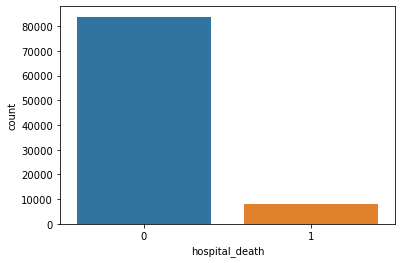

In [ ]:
sns.countplot(data=df,x='hospital_death')

Traget columns shows that it is an imbalanced dataset and binary classification problem 

Analysing and Treating Categorical columns

In [6]:
df_cat=df[df.select_dtypes(include=['object']).columns]
df_cat[0:3]


,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,apache_3j_bodysystem,apache_2_bodysystem
0,Caucasian,M,Floor,Floor,admit,CTICU,Sepsis,Cardiovascular
1,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,Respiratory,Respiratory
2,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,Metabolic,Metabolic


Viz of Categorical data against the hospital death

In [ ]:
pd.crosstab(df['ethnicity'],df['hospital_death']).sort_values(by=[0],ascending=False)

hospital_death,0,1
ethnicity,,
Caucasian,64516,6168
African American,8797,750
Other/Unknown,4021,353
Hispanic,3420,376
Asian,1036,93
Native American,718,70


<AxesSubplot:xlabel='ethnicity'>

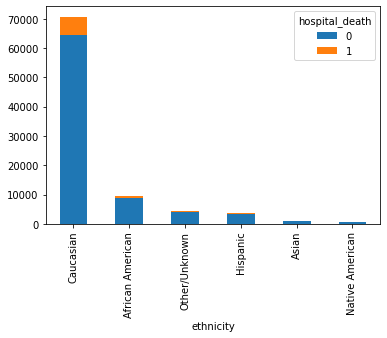

In [ ]:
pd.crosstab(df['ethnicity'],df['hospital_death']).sort_values(by=[0],ascending=False).plot.bar(stacked=True)

In [ ]:
pd.crosstab(df['gender'],df['hospital_death']).sort_values(by=[0],ascending=False)

hospital_death,0,1
gender,,
M,45293,4176
F,38488,3731


<AxesSubplot:xlabel='gender'>

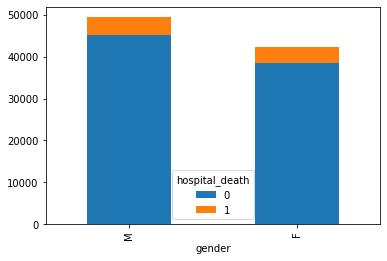

In [ ]:
pd.crosstab(df['gender'],df['hospital_death']).sort_values(by=[0],ascending=False).plot.bar(stacked=True)

In [ ]:
pd.crosstab(df['hospital_admit_source'],df['hospital_death']).sort_values(by=[0],ascending=False)

hospital_death,0,1
hospital_admit_source,,
Emergency Department,33735,3227
Operating Room,9442,345
Floor,6937,1118
Direct Admit,5780,661
Recovery Room,2792,104
Acute Care/Floor,1709,201
Other Hospital,1419,222
PACU,987,30
Step-Down Unit (SDU),918,213


<AxesSubplot:xlabel='hospital_admit_source'>

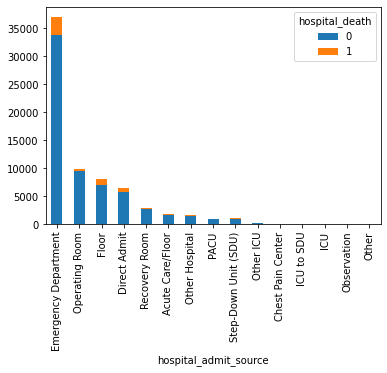

In [ ]:
pd.crosstab(df['hospital_admit_source'],df['hospital_death']).sort_values(by=[0],ascending=False).plot.bar(stacked=True)

In [ ]:
pd.crosstab(df['icu_stay_type'],df['hospital_death']).sort_values(by=[0],ascending=False)

hospital_death,0,1
icu_stay_type,,
admit,78843,7340
transfer,4445,525
readmit,510,50


<AxesSubplot:xlabel='icu_stay_type'>

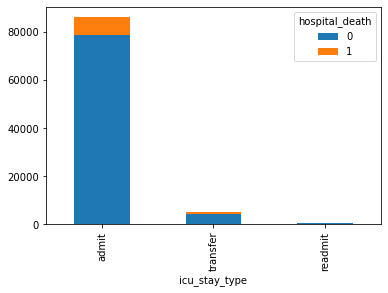

In [ ]:
pd.crosstab(df['icu_stay_type'],df['hospital_death']).sort_values(by=[0],ascending=False).plot.bar(stacked=True)

In [ ]:
pd.crosstab(df['apache_3j_bodysystem'],df['hospital_death']).sort_values(by=[0],ascending=False)

hospital_death,0,1
apache_3j_bodysystem,,
Cardiovascular,27609,2390
Neurological,10956,940
Respiratory,10308,1301
Sepsis,9886,1854
Gastrointestinal,8356,670
Metabolic,7534,116
Trauma,3583,259
Genitourinary,2038,134
Musculoskeletal/Skin,1111,55


<AxesSubplot:xlabel='apache_3j_bodysystem'>

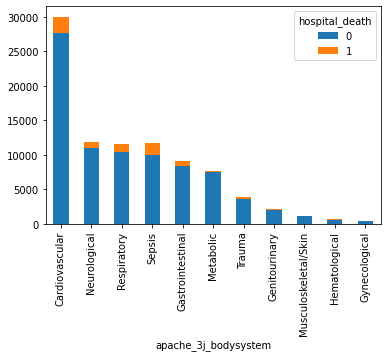

In [ ]:
pd.crosstab(df['apache_3j_bodysystem'],df['hospital_death']).sort_values(by=[0],ascending=False).plot.bar(stacked=True)

In [ ]:
pd.crosstab(df['apache_2_bodysystem'],df['hospital_death']).sort_values(by=[0],ascending=False)

hospital_death,0,1
apache_2_bodysystem,,
Cardiovascular,34609,4207
Neurologic,10956,940
Respiratory,10308,1301
Gastrointestinal,8356,670
Metabolic,7534,116
Undefined diagnoses,3694,74
Trauma,3583,259
Renal/Genitourinary,2324,136
Haematologic,580,58


<AxesSubplot:xlabel='apache_2_bodysystem'>

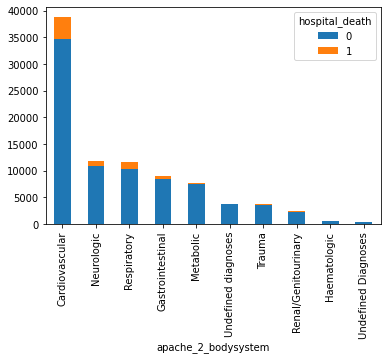

In [ ]:
pd.crosstab(df['apache_2_bodysystem'],df['hospital_death']).sort_values(by=[0],ascending=False).plot.bar(stacked=True)

In [29]:
pd.crosstab(df['icu_type'],df['hospital_death']).sort_values(by=[0],ascending=False)

hospital_death,0,1
icu_type,,
Med-Surg ICU,46160,4426
Neuro ICU,7037,638
MICU,6765,930
CCU-CTICU,6614,542
SICU,4819,390
CSICU,4359,254
Cardiac ICU,4282,494
CTICU,3762,241


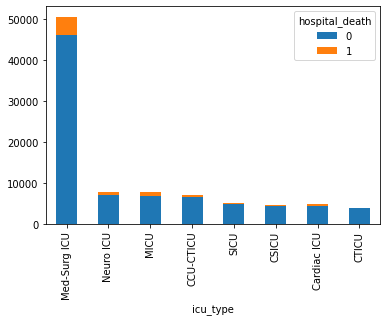

In [30]:
pd.crosstab(df['icu_type'],df['hospital_death']).sort_values(by=[0],ascending=False).plot.bar(stacked=True)

In [ ]:
df_cat.isna().sum()

ethnicity                0
gender                   0
hospital_admit_source    0
icu_admit_source         0
icu_stay_type            0
icu_type                 0
apache_3j_bodysystem     0
apache_2_bodysystem      0
dtype: int64

Filling with "other" for missing values in categorical columns

In [ ]:
df_cat=df_cat.fillna('other')

Encoding the categorical columns with oneHotEncoding Method

In [7]:
#Performing One hot encoding *********************************************************Catergory-ohdf ******************
ohdf = pd.get_dummies(df_cat, columns = df_cat.columns)
ohdf.shape

(91713, 60)

In [ ]:
ohdf.shape

(91713, 60)

Analyzing and treating Numerical(Integer) column data 

In [ ]:
integer_columns = df.select_dtypes(include=['int64']).columns
df[integer_columns][0:3]


,encounter_id,patient_id,hospital_id,hospital_death,elective_surgery,icu_id,readmission_status,apache_post_operative
0,66154,25312,118,0,0,92,0,0
1,114252,59342,81,0,0,90,0,0
2,119783,50777,118,0,0,93,0,0


<AxesSubplot:xlabel='elective_surgery'>

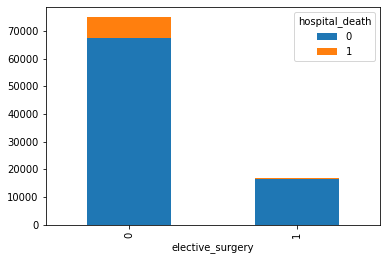

In [ ]:
pd.crosstab(df['elective_surgery'],df['hospital_death']).sort_values(by=[0],ascending=False).plot.bar(stacked=True)

<AxesSubplot:xlabel='apache_post_operative'>

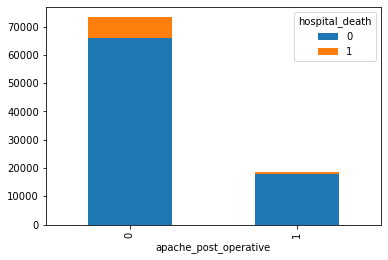

In [ ]:
pd.crosstab(df['apache_post_operative'],df['hospital_death']).sort_values(by=[0],ascending=False).plot.bar(stacked=True)

Observation:

encounter_id,patient_id,hospital_id,icu_id - can be dropped

readmission_status - The value is zero.It can be dropped.	

apache_post_operative,elective_surgery - have 2 distinct unique values (0,1) and can be retained.

In [ ]:
df.drop(['encounter_id','patient_id','hospital_id','icu_id','readmission_status'],axis=1,inplace=True)
df.shape

(91713, 181)

KNN Imputer method for filling missing values

In [ ]:
def missing_value_finder(df,per):
    # Total missing values by column
    mis_val = df.isnull().sum()

    # Percentage of missing values by column
    mis_val_percent = 100 * df.isnull().sum() / len(df) > per

    # build a table with the thw columns
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    mis_col_rename=mis_val_table.rename(columns={0:"Missing Value",1: "% of Missing value"})

    missing_table=mis_col_rename[mis_col_rename.iloc[:,1]!=0].sort_values('% of Missing value',ascending=False).round(2)
    #print('Number of missing columns more than {} % is {} :'.format(per,len(missing_table)))
    
    return missing_table
    
print('Number of missing columns more than 10 % is',len(missing_value_finder(df,10)))
print('Number of missing columns more than 30 % is',len(missing_value_finder(df,30)))
print('Number of missing columns more than 70 % is',len(missing_value_finder(df,70)))



Number of missing columns more than 10 % is 103
Number of missing columns more than 30 % is 74
Number of missing columns more than 70 % is 55


Observation: We shall drop columns having more than 70 % missing values.

In [ ]:
colMorethan70=list(missing_value_finder(df,70).index.values)
df.drop(df[colMorethan70],axis=1,inplace=True)
df.shape

(91713, 126)

In [ ]:
#Dropping categorical columns
df.drop(df_cat.columns,axis=1,inplace=True)
df.shape

(91713, 118)

Filling missing values by KNN imputing for Numerical columns.
So combining ohdf with df and input the df to KNN imputer.

In [ ]:
df=df.join(ohdf)
df.shape

(91713, 184)

In [ ]:
knn_imputing =True
if knn_imputing:
    imputer = KNNImputer(n_neighbors=7, weights='uniform', metric='nan_euclidean')
    imputer.fit(df)
    # transform the dataset
    Xtrans = imputer.transform(df) 
    df_imp=pd.DataFrame(Xtrans,columns=df.columns)
    df_imp.to_csv('df_imputed.csv',index=False) 

In [4]:
# loading the imputed csv file
df_imp=pd.read_csv('df_imputed.csv')

In [25]:
copydf_imp=df_imp.copy()

In [8]:
df_imp.drop(ohdf.columns,axis=1,inplace=True)
df_imp.shape

(91713, 124)

Feature engineering:Creating new column xxx_avg by taking mean of xxx.min and xxx.max columns

In [9]:
df_avg=df_imp.iloc[:,30:108]
df_avg.shape

(91713, 78)

In [10]:
dfav=pd.DataFrame()
j=0
for i in range(0,len(df_avg.columns),2):
    colName=df_avg.columns[i].rsplit("_",1)[0]+"_avg"
    dfav[colName]=df_avg.iloc[:,j:i+2].mean(axis=1)
    j=i+2

In [11]:
df_imp.drop(df_avg.columns,axis=1,inplace=True)


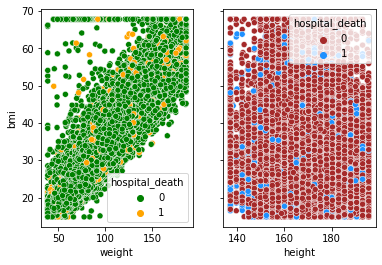

In [5]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.scatterplot(data=df,y='bmi',x='weight',hue=target,ax=ax1,palette=['green','orange'])
sns.scatterplot(data=df,y='bmi',x='height',hue=target,ax=ax2,palette=['brown','dodgerblue'])


Observation:BMI is calculated based on weight and height.So we shall retain BMI and drop height and weight.

In [12]:
df_imp.drop(['height','weight'],axis=1,inplace=True)
df1=df_imp.join(dfav)
df1.shape

(91713, 83)

Finding correlation between all numerical columns

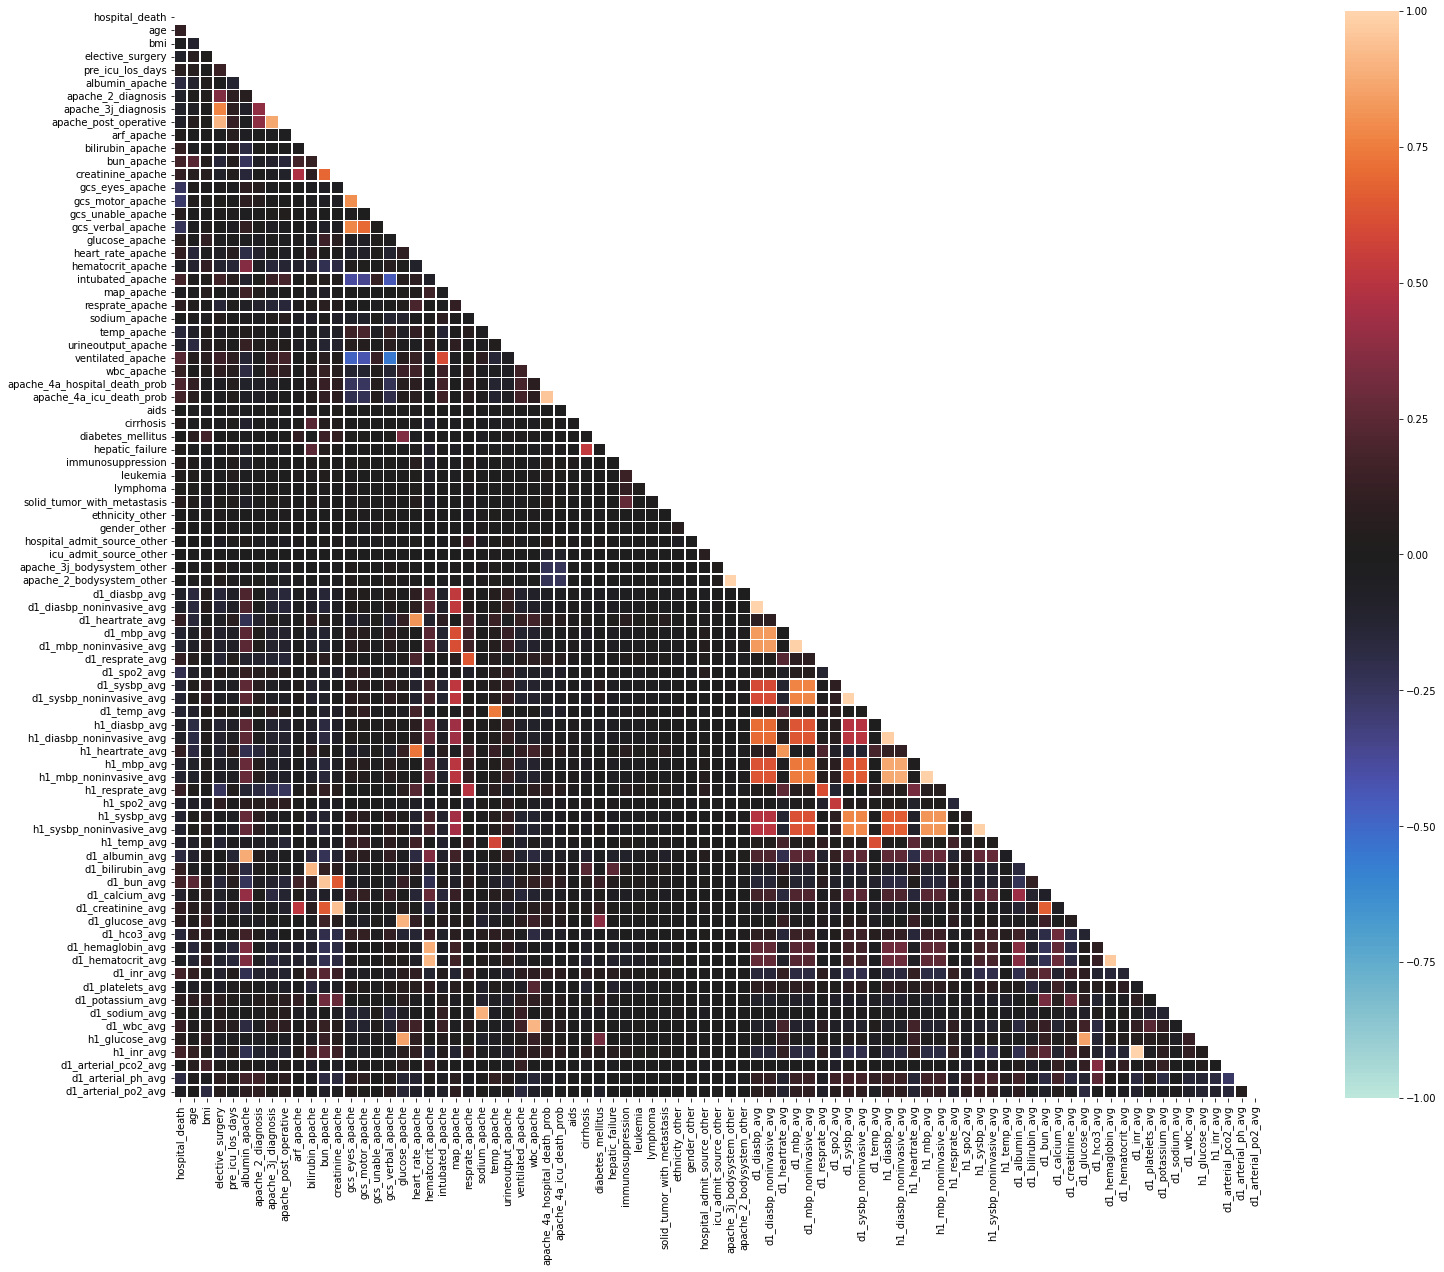

In [13]:
plt.figure(figsize=(30,20))
cor_df=df1.corr()
mask=np.zeros_like(cor_df)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(cor_df,  vmin=-1, vmax=1, center=0,
     square=True,linewidth=0.5,mask=mask)

List of positively correlated variables

In [16]:
c = cor_df.abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
pos_corr=so[6750:6800]
pos_corr.drop_duplicates(inplace=True)
print(pos_corr)



d1_diasbp_noninvasive_avg      d1_mbp_noninvasive_avg           0.838458
d1_mbp_noninvasive_avg         d1_diasbp_noninvasive_avg        0.838458
h1_glucose_avg                 d1_glucose_avg                   0.852229
d1_glucose_avg                 h1_glucose_avg                   0.852229
glucose_apache                 h1_glucose_avg                   0.856723
h1_glucose_avg                 glucose_apache                   0.856723
h1_diasbp_avg                  h1_mbp_noninvasive_avg           0.870139
h1_mbp_noninvasive_avg         h1_diasbp_avg                    0.870139
apache_post_operative          apache_3j_diagnosis              0.871688
apache_3j_diagnosis            apache_post_operative            0.871688
h1_diasbp_avg                  h1_mbp_avg                       0.872194
h1_mbp_avg                     h1_diasbp_avg                    0.872194
h1_diasbp_noninvasive_avg      h1_mbp_avg                       0.872613
h1_mbp_avg                     h1_diasbp_noninvasiv

In [ ]:
 col=['ethnicity_other', 'gender_other','hospital_admit_source_other', 'icu_admit_source_other','apache_3j_bodysystem_other', 'apache_2_bodysystem_other']
 df1.drop(col,axis=1,inplace=True)

In [ ]:
df1.drop('hospital_death',axis=1,inplace=True)
df1.to_csv("df_onlyNumericTarget.csv")

Finding Base line accuracy with all numerical(76) and categorical(60) features testing on Randomforest model without feature selection methods

In [ ]:
df_p=df1.join(ohdf)

In [18]:
def upsampling(X_train,y_train):
    counter = Counter(target)

    print("Before Sampling")

    for k,v in counter.items():
        per = 100*v/len(y_train)
        print(f"Class= {k}, n={v} ({per:.2f}%)")

    oversample = SMOTE()
    X, Y = oversample.fit_resample(X_train, y_train)

    counter = Counter(Y)

    print("After sampling")

    for k,v in counter.items():
        per = 100*v/len(Y)
        print(f"Class= {k}, n={v} ({per:.2f}%)")

    print("=============================")

    print("Upsampled data shape: ", X.shape,Y.shape)
    
    return (X,Y)    


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_p,target, test_size=0.30, random_state=1, stratify=target)
X,Y=upsampling(X_train,y_train)

Before Sampling
Class= 0, n=83798 (130.53%)
Class= 1, n=7915 (12.33%)
After sampling
Class= 0, n=58659 (50.00%)
Class= 1, n=58659 (50.00%)
Upsampled data shape:  (117318, 136) (117318,)


In [ ]:

model= RandomForestClassifier(max_depth=25,min_samples_leaf= 0.000001,min_samples_split= 0.000001,n_estimators=250,random_state= 42)
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print(k,"-",'Accuracy: %.2f' % (accuracy*100))

59 - Accuracy: 92.85


Observation:
RandomForest Model gives 92.85 % accuracy with all the 136 features.

In [ ]:
#X=df_p and Y=target

Feature Selection  Method. 

1. ANOVA Method for Numercial columns.(df1)

2. CHI-Square method for categorical columns.(ohdf)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1,target, test_size=0.30, random_state=1, stratify=target)


Upsampling the data as the dataset is imbalanced

In [ ]:
X,Y=upsampling(X_train,y_train)

Before Sampling
Class= 0, n=83798 (130.53%)
Class= 1, n=7915 (12.33%)
After sampling
Class= 0, n=58659 (50.00%)
Class= 1, n=58659 (50.00%)
Upsampled data shape:  (117318, 76) (117318,)


In [ ]:
#Using ANOVA

def select_features(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_classif, k=76)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs
# feature selection
X_train_fs,X_test_fs,fs=select_features(X, Y, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs,Y)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100)) 

Accuracy: 80.10


Feature ranking:
1. feature 25 (21902.029054) - ventilated_apache
2. feature 13 (19426.039474) - gcs_motor_apache
3. feature 15 (19405.920297) - gcs_verbal_apache
4. feature 12 (19342.037877) - gcs_eyes_apache
5. feature 27 (12927.789756) - apache_4a_hospital_death_prob
6. feature 4 (9987.761972) - albumin_apache
7. feature 28 (9966.311672) - apache_4a_icu_death_prob
8. feature 57 (9901.812828) - d1_albumin_avg
9. feature 59 (9624.960739) - d1_bun_avg
10. feature 10 (9260.256452) - bun_apache
11. feature 19 (8818.565901) - intubated_apache
12. feature 43 (8411.238360) - d1_spo2_avg
13. feature 72 (7568.847713) - h1_inr_avg
14. feature 66 (7568.847713) - d1_inr_avg
15. feature 44 (7275.708859) - d1_sysbp_avg
16. feature 45 (7234.563430) - d1_sysbp_noninvasive_avg
17. feature 74 (6240.479744) - d1_arterial_ph_avg
18. feature 0 (6187.884333) - age
19. feature 52 (6181.404802) - h1_resprate_avg
20. feature 40 (6003.128036) - d1_mbp_avg
21. feature 41 (6002.290527) - d1_mbp_noninvasive_avg


Text(0.5, 1.0, 'ANOVA - Feature Importance Plot')

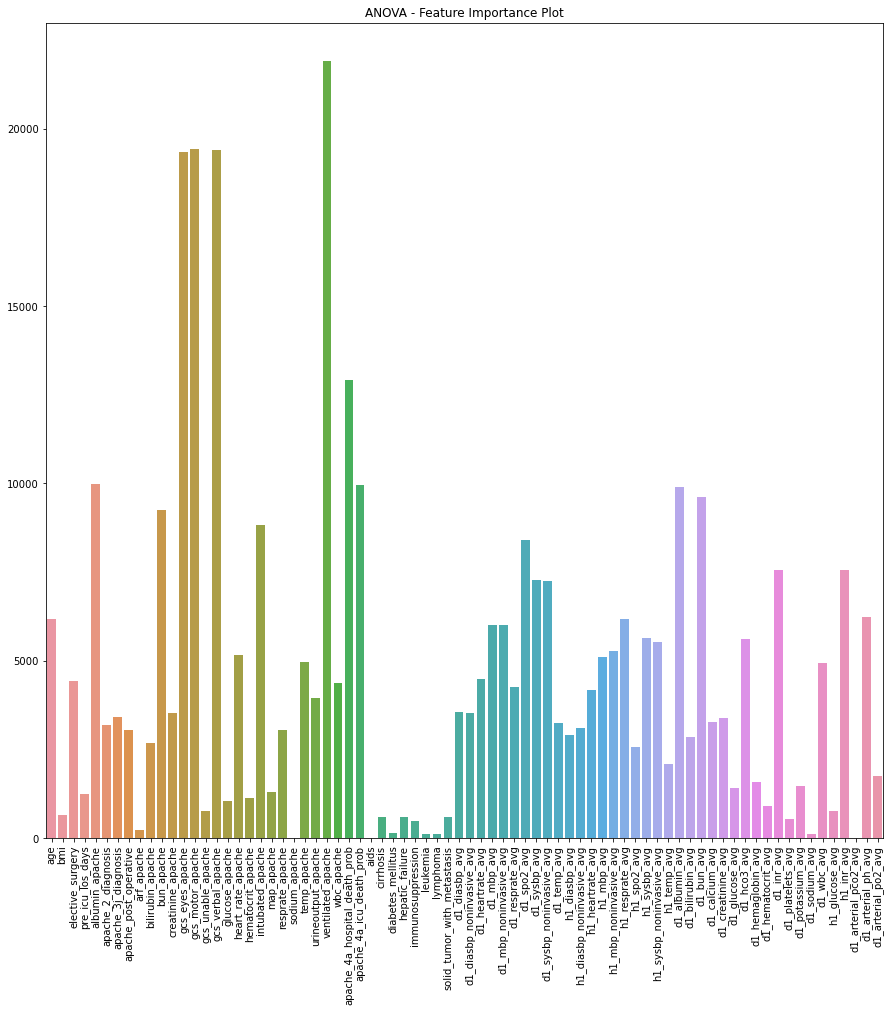

In [ ]:
#Feature Ranking 
X_traindf = pd.DataFrame(data = X_train) 
importances = fs.scores_

indices = np.argsort(importances)[::-1]
copy_Numerical= indices
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),'-',X_traindf.columns[indices[f]])

# plot the scores
plt.figure(figsize=(15,15))
sns.barplot(y = fs.scores_,x = X_traindf.columns)
plt.xticks(rotation=90)
plt.title('ANOVA - Feature Importance Plot')    

All 76 features give 80.13 accuracy.

20 features give 78.9 % accuracy i.e ~ 79 % accuracy.We shall proceed with top 20 features inorder to reduce the dimension. 

In [ ]:
numdf_20=df1.iloc[:,indices.tolist()[0:20]] # Numerical **********************************************
numdf_76=df1.iloc[:,indices.tolist()]
numdf_20.shape

(91713, 20)

Chi-square method for categorical columns

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(ohdf,target,test_size = 0.1,stratify=target)

In [ ]:
X,Y=upsampling(X_train,y_train)

Before Sampling
Class= 0, n=83798 (101.52%)
Class= 1, n=7915 (9.59%)
After sampling
Class= 0, n=75418 (50.00%)
Class= 1, n=75418 (50.00%)
Upsampled data shape:  (150836, 60) (150836,)


In [ ]:
for k in range(1,60):
    fs = SelectKBest(score_func=chi2, k=k)
    fs.fit(X, Y)
    X_train_fs = fs.transform(X)
    X_test_fs = fs.transform(X_test)
    #model = LogisticRegression(max_iter=1000)
    #model.fit(X_train_fs, y_train)
    model= RandomForestClassifier(max_depth=25,min_samples_leaf= 0.000001,min_samples_split= 0.000001,n_estimators=250,random_state= 42)
    model.fit(X_train_fs, Y)
    # evaluate the model
    yhat = model.predict(X_test_fs)
    # evaluate predictions
    accuracy = accuracy_score(y_test, yhat)
    print(k,"-",'Accuracy: %.2f' % (accuracy*100))

1 - Accuracy: 17.38
2 - Accuracy: 60.92
3 - Accuracy: 62.43
4 - Accuracy: 57.44
5 - Accuracy: 57.56
6 - Accuracy: 58.74
7 - Accuracy: 30.08
8 - Accuracy: 35.31
9 - Accuracy: 80.94
10 - Accuracy: 78.54
11 - Accuracy: 74.83
12 - Accuracy: 73.86
13 - Accuracy: 74.07
14 - Accuracy: 73.17
15 - Accuracy: 76.55
16 - Accuracy: 77.25
17 - Accuracy: 80.34
18 - Accuracy: 82.09
19 - Accuracy: 81.62
20 - Accuracy: 81.89
21 - Accuracy: 81.97
22 - Accuracy: 81.98
23 - Accuracy: 81.52
24 - Accuracy: 81.57
25 - Accuracy: 79.59
26 - Accuracy: 77.98
27 - Accuracy: 78.06
28 - Accuracy: 78.12
29 - Accuracy: 77.17
30 - Accuracy: 77.21
31 - Accuracy: 77.25
32 - Accuracy: 77.29
33 - Accuracy: 77.24
34 - Accuracy: 77.19
35 - Accuracy: 77.19
36 - Accuracy: 77.12
37 - Accuracy: 77.31
38 - Accuracy: 77.37
39 - Accuracy: 77.33
40 - Accuracy: 77.42
41 - Accuracy: 77.04
42 - Accuracy: 77.09
43 - Accuracy: 77.55
44 - Accuracy: 69.62
45 - Accuracy: 69.56
46 - Accuracy: 70.84
47 - Accuracy: 70.15
48 - Accuracy: 70.18
4

Feature ranking:
1. feature 0 (127292.075186) - ethnicity_African American
2. feature 11 (114594.809900) - hospital_admit_source_Emergency Department
3. feature 5 (113100.253834) - ethnicity_Other/Unknown
4. feature 10 (109716.148784) - hospital_admit_source_Direct Admit
5. feature 3 (86030.005664) - ethnicity_Hispanic
6. feature 38 (85119.775023) - icu_type_SICU
7. feature 33 (82539.927245) - icu_type_CTICU
8. feature 31 (75527.023523) - icu_type_CCU-CTICU
9. feature 35 (72779.679248) - icu_type_MICU
10. feature 34 (70515.042626) - icu_type_Cardiac ICU
11. feature 12 (70269.441817) - hospital_admit_source_Floor
12. feature 8 (61287.818911) - hospital_admit_source_Acute Care/Floor
13. feature 1 (59657.178906) - ethnicity_Asian
14. feature 37 (59370.405914) - icu_type_Neuro ICU
15. feature 30 (58331.471383) - icu_stay_type_transfer
16. feature 4 (49967.783397) - ethnicity_Native American
17. feature 18 (42684.283931) - hospital_admit_source_Other Hospital
18. feature 21 (41335.139015) -

Text(0.5, 1.0, 'Chi-Squared - Feature Importance Plot')

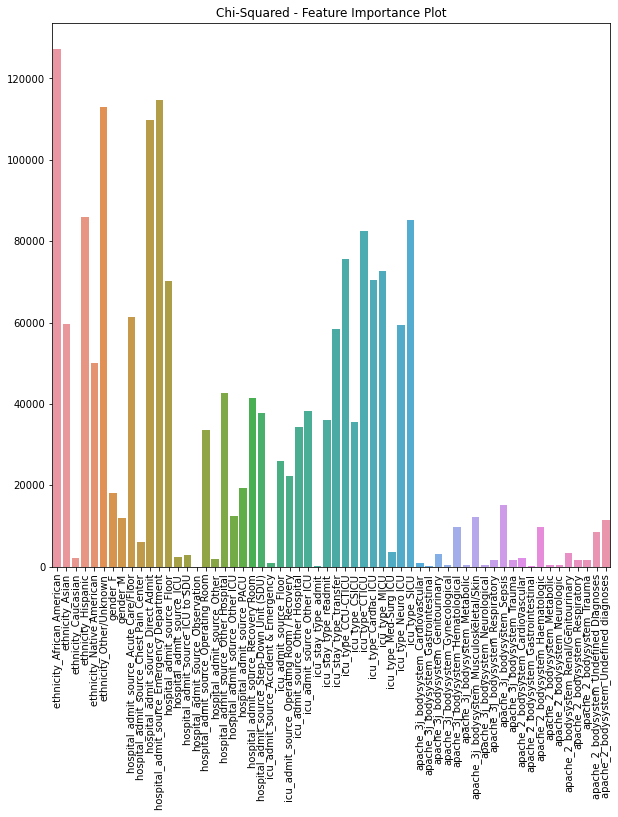

In [ ]:
#Feature Ranking 
X_traindf = pd.DataFrame(data = X_train) 
importances = fs.scores_

indices = np.argsort(importances)[::-1]
copyIndicies = indices
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),'-',X_traindf.columns[indices[f]])

# plot the scores
plt.figure(figsize=(10,10))
sns.barplot(y = fs.scores_,x = X_traindf.columns)
plt.xticks(rotation=90)
plt.title('Chi-Squared - Feature Importance Plot')    

Observation:
Choosing top 18 features giving 82 % accuracy.

In [ ]:
#Saving the df in order
cat_18=ohdf.iloc[:,indices.tolist()[0:18]]
cat_60=ohdf.iloc[:,indices.tolist()]
cat_18.shape

(91713, 18)

Data Preparation.

1.Select 20 numerical features and 18 categorical features.

In [ ]:
df_2018=numdf_20.join(cat_18)
df_2018.shape

(91713, 38)

In [ ]:
X_train, testX, y_train, testY = train_test_split(df_2018,target, test_size=0.30, random_state=1, stratify=target)
X,Y=upsampling(X_train,y_train)

Before Sampling
Class= 0, n=83798 (130.53%)
Class= 1, n=7915 (12.33%)
After sampling
Class= 0, n=58659 (50.00%)
Class= 1, n=58659 (50.00%)
Upsampled data shape:  (117318, 38) (117318,)


In [ ]:
model= RandomForestClassifier(max_depth=25,min_samples_leaf= 0.000001,min_samples_split= 0.000001,n_estimators=250,random_state= 42)
model.fit(X, Y)
# evaluate the model
yhat = model.predict(testX)
# evaluate predictions
accuracy = accuracy_score(testY, yhat)
print(k,"-",'Accuracy: %.2f' % (accuracy*100))

59 - Accuracy: 91.61


Observation:(Data stratified and upsampled)
RandomForest Model gives 91.61 % accuracy with only 38 features.
Same Model gives 92.85 % accuracy with all the 136 features.We shall go with 38 features only.


Building NN Model Deep Learning Network

1.Baseline Model




In [19]:
X_train, X_test, y_train, Y_test = train_test_split(df_2018,target, test_size=0.30, random_state=1, stratify=target)
X,Y=upsampling(X_train,y_train)

Before Sampling
Class= 0, n=83798 (130.53%)
Class= 1, n=7915 (12.33%)
After sampling
Class= 0, n=58659 (50.00%)
Class= 1, n=58659 (50.00%)
Upsampled data shape:  (117318, 38) (117318,)


Parameters:
hidden Layer =4 (100,80,50,10,1),
activation = relu,
Kernel initializer = he_uniform,
output layer activation = Sigmoid,
optimizer =Adam.
epochs=10


In [21]:
X_train, Y_train =X,Y
model = Sequential()
model.add(Dense(100, input_dim=38, activation='relu',kernel_initializer='he_uniform' ))
model.add(Dense(80, activation='relu' ))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history = model.fit(X_train, Y_train,validation_data=(X_test, Y_test) ,epochs=10)

Train on 117318 samples, validate on 27514 samples
Epoch 1/10
116928/117318 [============================>.] - ETA: 0s - loss: 0.4591 - accuracy: 0.7951

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


117318/117318 [==============================] - 11s 91us/sample - loss: 0.4591 - accuracy: 0.7951 - val_loss: 0.2630 - val_accuracy: 0.9003
Epoch 2/10
117318/117318 [==============================] - 7s 60us/sample - loss: 0.3810 - accuracy: 0.8329 - val_loss: 0.4780 - val_accuracy: 0.7805
Epoch 3/10
117318/117318 [==============================] - 6s 55us/sample - loss: 0.3696 - accuracy: 0.8402 - val_loss: 0.4885 - val_accuracy: 0.7743
Epoch 4/10
117318/117318 [==============================] - 6s 55us/sample - loss: 0.3633 - accuracy: 0.8426 - val_loss: 0.3218 - val_accuracy: 0.8687
Epoch 5/10
117318/117318 [==============================] - 7s 56us/sample - loss: 0.3570 - accuracy: 0.8463 - val_loss: 0.3816 - val_accuracy: 0.8319
Epoch 6/10
117318/117318 [==============================] - 7s 56us/sample - loss: 0.3508 - accuracy: 0.8480 - val_loss: 0.4937 - val_accuracy: 0.7774
Epoch 7/10
117318/117318 [==============================] - 7s 55us/sample - loss: 0.3465 - accuracy: 0.

<b> Hyper Parameter Tuning <b>

GridSearch-I Batchsize and Epoch

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(100, input_dim=38, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(100, activation='relu',kernel_initializer='he_uniform'  ))
    model.add(Dense(50, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(10, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(1, activation='sigmoid'))
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)
batch_size = [64,256]
epochs = [100,200]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: 0.858513 using {'batch_size': 256, 'epochs': 200}
0.844099 (0.022619) with: {'batch_size': 64, 'epochs': 100}
0.582178 (0.412051) with: {'batch_size': 64, 'epochs': 200}
0.811947 (0.047832) with: {'batch_size': 256, 'epochs': 100}
0.858513 (0.025879) with: {'batch_size': 256, 'epochs': 200}


Observation:Batch size =256 and epoch = 200 did well



Gridsearch-II Dropout and weight constraint

In [ ]:
def create_model(dropout_rate=0.0, weight_constraint=0):
    model = Sequential()
    model.add(Dense(100, input_dim=38, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dropout(dropout_rate))
    model.add(Dense(100, activation='relu',kernel_initializer='he_uniform'  ))
    model.add(Dropout(dropout_rate))
    model.add(Dense(50, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(10, activation='relu',kernel_initializer='he_uniform' ))
    model.add(Dense(1, activation='sigmoid'))
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,batch_size = 256,epochs = 200,verbose=0)
weight_constraint = [1, 2]
dropout_rate = [0.2, 0.1]
param_grid = dict(weight_constraint =weight_constraint, dropout_rate = dropout_rate )
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Best: 0.868452 using {'dropout_rate': 0.1, 'weight_constraint': 2}
0.851046 (0.027000) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.868324 (0.030856) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.855947 (0.032244) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.868452 (0.031353) with: {'dropout_rate': 0.1, 'weight_constraint': 2}


In [ ]:
Observation:Dropout=0.1 and weight_constraint :2 did well

Gridsearch III - Kernel Initializer

In [ ]:
def create_model(init_mode='uniform'):
    model = Sequential()
    model.add(Dense(100, input_dim=38, activation='relu',kernel_initializer=init_mode ))
    model.add(Dropout(0.1))
    model.add(Dense(100, activation='relu',kernel_initializer=init_mode  ))
    model.add(Dropout(0.1))
    model.add(Dense(50, activation='relu',kernel_initializer=init_mode ))
    model.add(Dense(10, activation='relu',kernel_initializer=init_mode ))
    model.add(Dense(1, activation='sigmoid'))
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=0)
init_mode = ['glorot_normal','he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  


Best: 0.705510 using {'init_mode': 'glorot_normal'}
0.705510 (0.095782) with: {'init_mode': 'glorot_normal'}
0.677535 (0.149761) with: {'init_mode': 'he_uniform'}


Observation:Glorot normal did well

Stratified 10 fold Cross validation with SMOTE applied for each training dataset.

In [22]:
smoter = SMOTE(random_state=42)
def evaluateModel(mod):
    skf= StratifiedKFold(n_splits=10,shuffle=True,random_state=11)
    dataX=df_2018
    dataY=target
    count=0
    for train,test in skf.split(dataX,dataY):
        histories = list()
        #Define Model
        #select data to fit the model
        Xtrain, Ytrain, Xval, Yval = dataX.iloc[train], dataY.iloc[train], dataX.iloc[test], dataY.iloc[test]
        #Upsample the training dataset
        Xup,Yup=smoter.fit_resample(Xtrain, Ytrain)
        start=time.time()
        history=mod.fit(Xup,Yup,epochs=200,batch_size=256,verbose=0,validation_data=(Xval, Yval))
        end=time.time()
        count+=1
        #Capturing loss and accuracy
        loss, acc = model.evaluate(Xval, Yval, verbose=0)
        print('Fold ',count)
        print('Validation Loss',loss)
        print("Validation Accuracy")
        print('> %.3f' % (acc * 100.0))
        histories.append(history)
        #losses.append(loss)
        print("Time taken for each epochs : ",end-start)
    for i in range(len(histories)):
        # plot loss
        plt.subplot(211)
        plt.title('Cross Entropy Loss')
        plt.xlabel('epochs')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='val_test')
        plt.legend(bbox_to_anchor=(1.1, 1.05))

        # plot accuracy
        plt.subplot(212)
        plt.title('Classification Accuracy')
        plt.xlabel('epochs')
        plt.ylabel('Accuracies')
        #plt.title('Accuracy vs No. of epochs')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='val_test')
        plt.legend(bbox_to_anchor=(1.1, 1.05))

    plt.tight_layout(pad=3.0)
    plt.show() 

    loss, acc = mod.evaluate(Xval, Yval, verbose=0)
    print('Testing loss \t', loss)
    print('Testing accuracy ', acc * 100, '%')
    return mod


droprate=0.1,
batch size=256,
epochs=100,
learning rate :0.01,
optimizer =adam,
activation =relu,
kernel initializer=he_uniform

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Fold  1
Validation Loss 0.3192227795245707
Validation Accuracy
> 87.724
Time taken for each epochs :  410.45850133895874
Fold  2
Validation Loss 0.3412204866215905
Validation Accuracy
> 85.619
Time taken for each epochs :  444.6480598449707
Fold  3
Validation Loss 0.33401372116359623
Validation Accuracy
> 85.118
Time taken for each epochs :  401.5620515346527
Fold  4
Validation Loss 0.34757285402900273
Validation Accuracy
> 85.683
Time taken for each epochs :  398.21529603004456
Fold  5
Validation Loss 0.35891735905351013
Validation Accuracy
> 84.985
Time taken for each epochs :  397.7884347438812
Fold  6
Validation Loss 0.36767448829520477
Validation Accuracy
> 84.309
Time taken for each epochs :  416.1796624660492
Fold  7
Validation Loss 0.4067821305043278
Validation Accuracy
> 81.899
Time taken for each epochs :  404.0702130794525
Fold  8
Validation Loss 0.3498092009364525
Validation Accuracy
> 85.171
Time taken for each epochs :  398.260968208313
Fold  9
Validation Loss 0.488574883

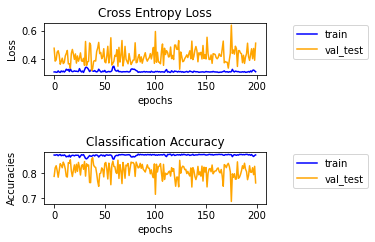

Testing loss 	 0.5119768065060125
Testing accuracy  76.17489695549011 %


In [23]:
model = Sequential()
model.add(Dense(100, input_dim=38, activation='relu',kernel_initializer='he_uniform' ))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu',kernel_initializer='he_uniform'  ))
model.add(Dropout(0.1))
model.add(Dense(50, activation='relu',kernel_initializer='he_uniform' ))
model.add(Dense(10, activation='relu',kernel_initializer='he_uniform' ))
model.add(Dense(1, activation='sigmoid'))
opt =tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
mod=evaluateModel(model)

Stratified 10 fold CV with Smote applied for each training dataset.

droprate=0.1,
batch size=256,
epochs=200,
learning rate :0.001,
optimizer =adam,
activation =relu,
kernel initializer=he_uniform

Fold  1
Validation Loss 0.3014567494392395
Validation Accuracy
> 87.680
Time taken for 20 epochs :  262.84449553489685
Fold  2
Validation Loss 0.3229053318500519
Validation Accuracy
> 86.437
Time taken for 20 epochs :  262.08244609832764
Fold  3
Validation Loss 0.2861803472042084
Validation Accuracy
> 88.650
Time taken for 20 epochs :  262.10039591789246
Fold  4
Validation Loss 0.30301156640052795
Validation Accuracy
> 87.090
Time taken for 20 epochs :  218.02317643165588
Fold  5
Validation Loss 0.2805838882923126
Validation Accuracy
> 88.289
Time taken for 20 epochs :  220.54489636421204
Fold  6
Validation Loss 0.2854789197444916
Validation Accuracy
> 88.333
Time taken for 20 epochs :  262.0598635673523
Fold  7
Validation Loss 0.29291123151779175
Validation Accuracy
> 88.115
Time taken for 20 epochs :  220.27764749526978
Fold  8
Validation Loss 0.2745804488658905
Validation Accuracy
> 88.758
Time taken for 20 epochs :  262.0940408706665
Fold  9
Validation Loss 0.288738876581192
Valida

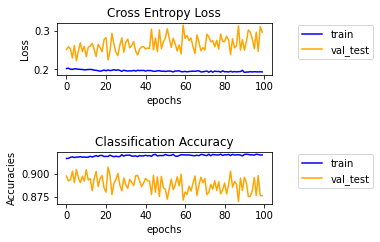

Testing loss 	 0.2967459559440613
Testing accuracy  87.59132027626038 %


In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=38, activation='relu',kernel_initializer='he_uniform' ))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu',kernel_initializer='he_uniform'  ))
model.add(Dropout(0.1))
model.add(Dense(50, activation='relu',kernel_initializer='he_uniform' ))
model.add(Dense(10, activation='relu',kernel_initializer='he_uniform' ))
model.add(Dense(1, activation='sigmoid'))
opt =tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
mod1=evaluateModel(model)

droprate=0.1,
batch size=256,
epochs=200,
learning rate :0.01,
optimizer =adam,
activation =relu,
kernel initializer=he_uniform

Fold  1
Validation Loss 0.6753068566322327
Validation Accuracy
> 91.365
Time taken for 20 epochs :  224.61981391906738
Fold  2
Validation Loss 0.6859862804412842
Validation Accuracy
> 91.365
Time taken for 20 epochs :  262.04838728904724
Fold  3
Validation Loss 0.6705172061920166
Validation Accuracy
> 91.365
Time taken for 20 epochs :  222.89753079414368
Fold  4
Validation Loss 0.6936269402503967
Validation Accuracy
> 8.625
Time taken for 20 epochs :  262.045042514801
Fold  5
Validation Loss 0.7010412216186523
Validation Accuracy
> 8.625
Time taken for 20 epochs :  262.0492537021637
Fold  6
Validation Loss 0.6897103190422058
Validation Accuracy
> 91.375
Time taken for 20 epochs :  262.0628275871277
Fold  7
Validation Loss 0.6872676610946655
Validation Accuracy
> 91.375
Time taken for 20 epochs :  262.0434379577637
Fold  8
Validation Loss 0.6925253868103027
Validation Accuracy
> 91.375
Time taken for 20 epochs :  225.94588923454285
Fold  9
Validation Loss 0.6932560205459595
Validation A

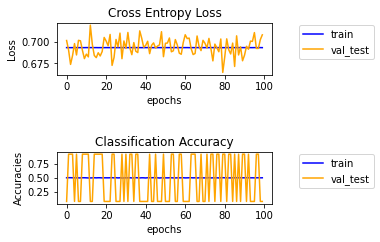

Testing loss 	 0.7080805897712708
Testing accuracy  8.63591730594635 %


In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=38, activation='relu',kernel_initializer='he_uniform' ))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu',kernel_initializer='he_uniform'  ))
model.add(Dropout(0.1))
model.add(Dense(50, activation='relu',kernel_initializer='he_uniform' ))
model.add(Dense(10, activation='relu',kernel_initializer='he_uniform' ))
model.add(Dense(1, activation='sigmoid'))
opt =tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=opt,metrics=['accuracy'])
mod1=evaluateModel(model)

Change in Learning rate to 0.01 causes accuracy variation between 8.6 and 91.375

Call back implementation for Learning rate with epoch <10,default 

Fold  1
Validation Loss 0.3575582802295685
Validation Accuracy
> 83.918
Time taken for 20 epochs :  228.57026171684265
Fold  2
Validation Loss 0.3347996175289154
Validation Accuracy
> 84.823
Time taken for 20 epochs :  262.06313037872314
Fold  3
Validation Loss 0.33986896276474
Validation Accuracy
> 84.900
Time taken for 20 epochs :  222.8083279132843
Fold  4
Validation Loss 0.3452686071395874
Validation Accuracy
> 84.244
Time taken for 20 epochs :  224.5850100517273
Fold  5
Validation Loss 0.34531891345977783
Validation Accuracy
> 84.724
Time taken for 20 epochs :  225.61946773529053
Fold  6
Validation Loss 0.3429188132286072
Validation Accuracy
> 84.582
Time taken for 20 epochs :  262.0514178276062
Fold  7
Validation Loss 0.3410246670246124
Validation Accuracy
> 84.593
Time taken for 20 epochs :  224.1687867641449
Fold  8
Validation Loss 0.33999598026275635
Validation Accuracy
> 85.094
Time taken for 20 epochs :  262.0571527481079
Fold  9
Validation Loss 0.34638163447380066
Validatio

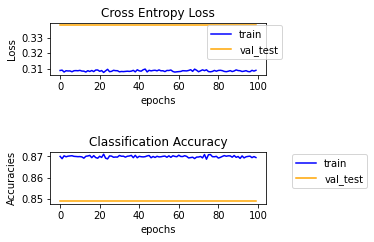

Testing loss 	 0.33802565932273865
Testing accuracy  84.87623929977417 %


0.0

In [ ]:

smoter = SMOTE(random_state=42)
def evaluateModel(mod):
    skf= StratifiedKFold(n_splits=10,shuffle=True,random_state=11)
    dataX=df_2018
    dataY=target
    count=0
    for train,test in skf.split(dataX,dataY):
        histories = list()
        #Define Model
        #select data to fit the model
        Xtrain, Ytrain, Xval, Yval = dataX.iloc[train], dataY.iloc[train], dataX.iloc[test], dataY.iloc[test]
        #Upsample the training dataset
        Xup,Yup=smoter.fit_resample(Xtrain, Ytrain)
        start=time.time()
        history=mod.fit(Xup,Yup,epochs=100,batch_size=256,verbose=0,callbacks=[callback],validation_data=(Xval, Yval))
        end=time.time()
        count+=1
        #Capturing loss and accuracy
        loss, acc = model.evaluate(Xval, Yval, verbose=0)
        print('Fold ',count)
        print('Validation Loss',loss)
        print("Validation Accuracy")
        print('> %.3f' % (acc * 100.0))
        histories.append(history)
        #losses.append(loss)
        print("Time taken for 20 epochs : ",end-start)
    for i in range(len(histories)):
        # plot loss
        plt.subplot(211)
        plt.title('Cross Entropy Loss')
        plt.xlabel('epochs')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='val_test')
        plt.legend(bbox_to_anchor=(1.1, 1.05))

        # plot accuracy
        plt.subplot(212)
        plt.title('Classification Accuracy')
        plt.xlabel('epochs')
        plt.ylabel('Accuracies')
        #plt.title('Accuracy vs No. of epochs')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='val_test')
        plt.legend(bbox_to_anchor=(1.1, 1.05))

    plt.tight_layout(pad=3.0)
    plt.show() 

    loss, acc = mod.evaluate(Xval, Yval, verbose=0)
    print('Testing loss \t', loss)
    print('Testing accuracy ', acc * 100, '%')
    return mod

def scheduler(epoch, lr):
    if epoch < 10:
       return lr
    else:
       return lr * tf.math.exp(-0.1)
       
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

model = Sequential()
model.add(Dense(100, input_dim=38, activation='relu',kernel_initializer='he_uniform' ))
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu',kernel_initializer='he_uniform'  ))
model.add(Dropout(0.1))
model.add(Dense(50, activation='relu',kernel_initializer='he_uniform' ))
model.add(Dense(10, activation='relu',kernel_initializer='he_uniform' ))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='Adam',metrics=['accuracy'])
mod2=evaluateModel(model)

round(model.optimizer.lr.numpy(), 5)

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Fold  1
Validation Loss 0.4003063169301102
Validation Accuracy
> 86.034
Time taken for each epochs :  266.2848114967346
Fold  2
Validation Loss 0.3413116066959088
Validation Accuracy
> 88.389
Time taken for each epochs :  265.7586326599121
Fold  3
Validation Loss 0.3171833000274605
Validation Accuracy
> 88.160
Time taken for each epochs :  264.4268636703491
Fold  4
Validation Loss 0.35671093560151634
Validation Accuracy
> 86.664
Time taken for each epochs :  267.4038851261139
Fold  5
Validation Loss 0.2706624532396486
Validation Accuracy
> 90.546
Time taken for each epochs :  270.6172399520874
Fold  6
Validation Loss 0.31216154577115696
Validation Accuracy
> 89.859
Time taken for each epochs :  266.06831550598145
Fold  7
Validation Loss 0.26319148706780204
Validation Accuracy
> 91.124
Time taken for each epochs :  292.15170526504517
Fold  8
Validation Loss 0.2985240115621932
Validation Accuracy
> 91.648
Time taken for each epochs :  265.91172313690186
Fold  9
Validation Loss 0.27259495

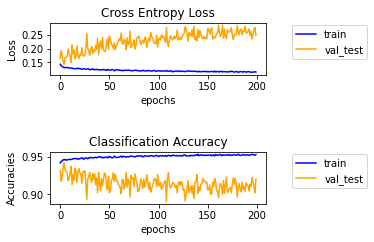

Testing loss 	 0.2471354107931297
Testing accuracy  92.04012751579285 %


In [24]:
smoter = SMOTE(random_state=42)
def evaluateModel(mod):
    skf= StratifiedKFold(n_splits=10,shuffle=True,random_state=11)
    dataX=df_2018
    dataY=target
    count=0
    for train,test in skf.split(dataX,dataY):
        histories = list()
        #Define Model
        #select data to fit the model
        Xtrain, Ytrain, Xval, Yval = dataX.iloc[train], dataY.iloc[train], dataX.iloc[test], dataY.iloc[test]
        #Upsample the training dataset
        Xup,Yup=smoter.fit_resample(Xtrain, Ytrain)
        start=time.time()
        history=mod.fit(Xup,Yup,epochs=200,batch_size=256,verbose=0,validation_data=(Xval, Yval))
        end=time.time()
        count+=1
        #Capturing loss and accuracy
        loss, acc = model.evaluate(Xval, Yval, verbose=0)
        print('Fold ',count)
        print('Validation Loss',loss)
        print("Validation Accuracy")
        print('> %.3f' % (acc * 100.0))
        histories.append(history)
        #losses.append(loss)
        print("Time taken for each epochs : ",end-start)
    for i in range(len(histories)):
        # plot loss
        plt.subplot(211)
        plt.title('Cross Entropy Loss')
        plt.xlabel('epochs')
        plt.ylabel('Loss')
        plt.plot(histories[i].history['loss'], color='blue', label='train')
        plt.plot(histories[i].history['val_loss'], color='orange', label='val_test')
        plt.legend(bbox_to_anchor=(1.1, 1.05))
# plot accuracy
        plt.subplot(212)
        plt.title('Classification Accuracy')
        plt.xlabel('epochs')
        plt.ylabel('Accuracies')
        #plt.title('Accuracy vs No. of epochs')
        plt.plot(histories[i].history['accuracy'], color='blue', label='train')
        plt.plot(histories[i].history['val_accuracy'], color='orange', label='val_test')
        plt.legend(bbox_to_anchor=(1.1, 1.05))

    plt.tight_layout(pad=3.0)
    plt.show() 

    loss, acc = mod.evaluate(Xval, Yval, verbose=0)
    print('Testing loss \t', loss)
    print('Testing accuracy ', acc * 100, '%')
    return mod

model = Sequential()
model.add(Dense(100, input_dim=38, activation='relu',kernel_initializer='he_uniform' ))
model.add(Dense(80, activation='relu' ))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
mod=evaluateModel(model)

In [27]:
model.save('keras_bestmodel.h5')

Conclusion:We shall select the model trained with 38 features giving cross validation accuracy  variations between 86 % to 92 %.
The parameters are :

Stratified 10 fold CV with Smote applied for each fold training dataset.

Hiddenlayers=(100,80,50,10,1),

batch size=64,

epochs=200,

optimizer =adam,

activation =relu,

kernel initializer=he_uniform



In [39]:
from keras.models import load_model
model = load_model('keras_bestmodel.h5')

## Explainable AI

In [32]:
X_train, X_test, y_train, Y_test = train_test_split(df_2018,target, test_size=0.30, random_state=1, stratify=target)
x_train=X_train.sample(200)
x_train=x_train.to_numpy()
x_test=X_test.to_numpy()

In [36]:
import shap
shap.initjs()

In [40]:
explainer = shap.DeepExplainer(model, x_train)
shap_values = explainer.shap_values(x_test)


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.


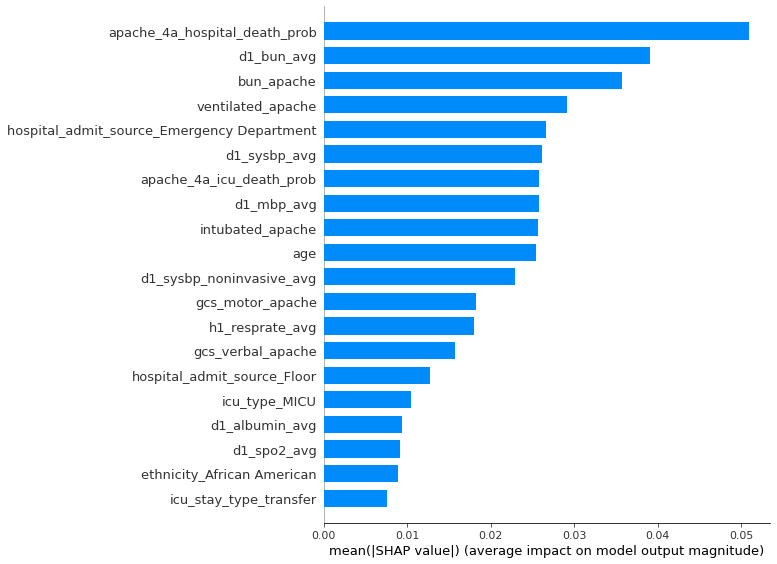

In [41]:
shap.summary_plot(shap_values[0], plot_type = 'bar', feature_names = X_test.columns)


In [15]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][0], features = X_test.columns)


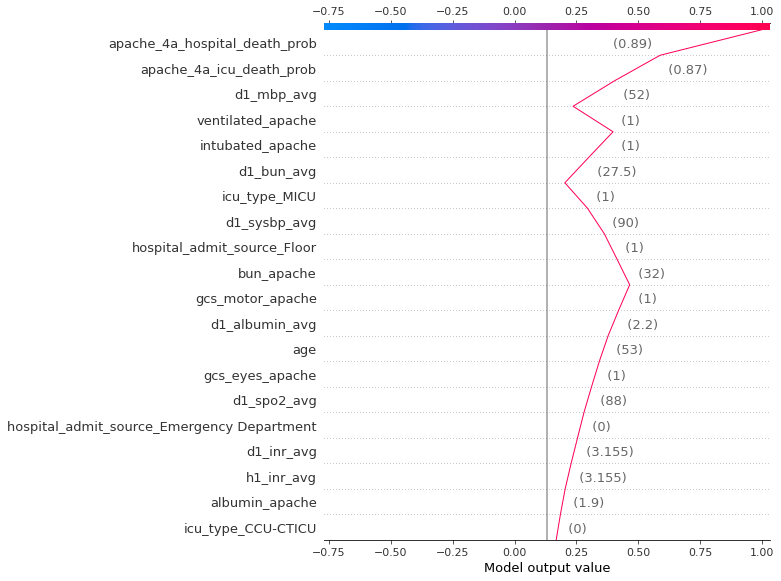

In [16]:
shap.decision_plot(explainer.expected_value[0], shap_values[0][0], features = X_test.iloc[0,:], feature_names = X_test.columns.tolist())


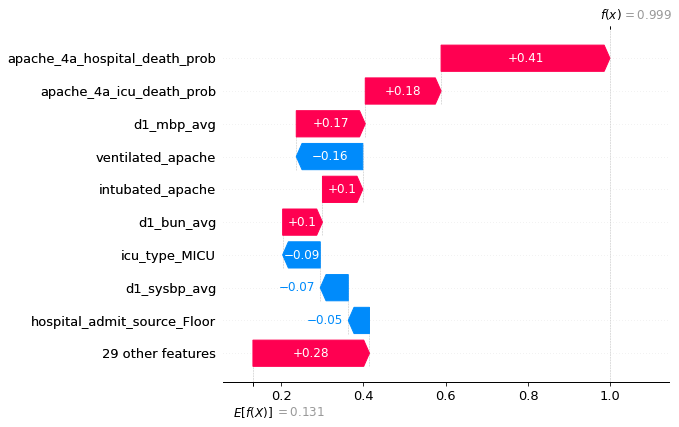

In [17]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0][0], feature_names = X_test.columns)
